# **DNA-seq-analysis**


In [20]:
import numpy as np
import matplotlib.pyplot as plt


# reading china dataset for covid19 mutation


In [1]:
from google.colab import files

uploaded = files.upload()


Saving China_Seq_2019_Dec.txt to China_Seq_2019_Dec.txt


# Printing head of China_Seq_2019_Dec.txt data

In [13]:
with open("/content/China_Seq_2019_Dec.txt", "r") as f:
    for i in range(5):   # change 5 to any number
        print(f.readline().strip())


>lcl|NC_045512.2_cds_YP_009724389.1_1 [gene=ORF1ab] [locus_tag=GU280_gp01] [db_xref=GeneID:43740578] [protein=ORF1ab polyprotein] [exception=ribosomal slippage] [protein_id=YP_009724389.1] [location=join(266..13468,13468..21555)] [gbkey=CDS]
ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTC
GCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAA
AGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTC
ATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAG


In [3]:
from google.colab import files

Usa_uploaded = files.upload()


Saving USA_Seq_2020_Jan.txt to USA_Seq_2020_Jan.txt


# Printing head of USA_Seq_2020_Jan.txt data

In [14]:
with open("/content/USA_Seq_2020_Jan.txt", "r") as f:
    for i in range(5):   # change 5 to any number
        print(f.readline().strip())


>lcl|MT412243.1_cds_QJF76185.1_1 [gene=ORF1ab] [protein=ORF1ab polyprotein] [exception=ribosomal slippage] [protein_id=QJF76185.1] [location=join(255..13457,13457..21544)] [gbkey=CDS]
ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTC
GCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAA
AGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTC
ATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAG


In [15]:

# This dictionary is used for reshaping the numpy array for each of the genes.
# For example, the gene ORF1ab numpy array will be reshaped with rows=115 and cols=115.
# The second element in the list represent 'n' number of dummy 'N' to be added at the end of
# each gene nucletode seq to make to compactible with the rows and cols of the array.
numpy_image_dict = {'gene=ORF1ab':[(115,115),7],
                    'gene=S':[(62,62),22],
                    'gene=ORF3a':[(28,30),12],
                    'gene=E':[(15,16),12],
                    'gene=M':[(26,27),33],
                    'gene=ORF6':[(14,14),10],
                    'gene=ORF7a':[(19,20),14],
                    'gene=ORF7b':[(12,12),12],
                    'gene=ORF8':[(19,20),14],
                    'gene=N':[(36,36),36],
                    'gene=ORF10':[(11,11),4]}


# This dictionary has the codons for the amino acids from mRNA.
amacid_dict = {'UUU':('F','PHE','Phenylalanine'),'UUC':('F','PHE','Phenylalanine'),
               'UUA':('L','LEU','Leucine'),'UUG':('L','LEU','Leucine'),
               'UCU':('S','SER','Serine'),'UCC':('S','SER','Serine'),
               'UCA':('S','SER','Serine'),'UCG':('S','SER','Serine'),
               'UAU':('Y','TYR','Tyrosine'),'UAC':('Y','TYR','Tyrosine'),
               'UAA':('STOP'),'UAG':('STOP'),
               'UGU':('C','CYS','Cysteine'),'UGC':('C','CYS','Cysteine'),
               'UGA':('STOP'),'UGG':('W','TRP','Tryptophan'),
               'CUU':('L','LEU','Leucine'),'CUC':('L','LEU','Leucine'),
               'CUA':('L','LEU','Leucine'),'CUG':('L','LEU','Leucine'),
               'CCU':('P','PRO','Proline'),'CCC':('P','PRO','Proline'),
               'CCA':('P','PRO','Proline'),'CCG':('P','PRO','Proline'),
               'CAU':('H','HIS','Histidine'),'CAC':('H','HIS','Histidine'),
               'CAA':('Q','GLU','Glutamine'),'CAG':('Q','GLU','Glutamine'),
               'CGU':('R','ARG','Arginine'),'CGA':('R','ARG','Arginine'),
               'CGG':('R','ARG','Arginine'),'CGC':('R','ARG','Arginine'),
               'AUU':('I','ILE','Isoleucine'),'AUC':('I','ILE','Isoleucine'),
               'AUA':('I','ILE','Isoleucine'),'AUG':('M','MET','Methionine'),
               'ACU':('T','THR','Threonine'),'ACC':('T','THR','Threonine'),
               'ACA':('T','THR','Threonine'),'ACG':('T','THR','Threonine'),
               'AAU':('N','ASN','Asparagine'),'AAC':('N','ASN','Asparagine'),
               'AAA':('K','LYS','Lysine'),'AAG':('K','LYS','Lysine'),
               'AGU':('S','SER','Serine'),'AGC':('S','SER','Serine'),
               'AGG':('R','ARG','Arginine'),'AGA':('R','ARG','Arginine'),
               'GUU':('V','VAL','Valine'),'GUC':('V','VAL','Valine'),
               'GUA':('V','VAL','Valine'),'GUG':('V','VAL','Valine'),
               'GCU':('A','ALA','Alanine'),'GCC':('A','ALA','Alanine'),
               'GCA':('A','ALA','Alanine'),'GCG':('A','ALA','Alanine'),
               'GAU':('D','ASP','Aspartate'),'GAC':('D','ASP','Aspartate'),
               'GAA':('E','GLU','Glutamate'),'GAG':('E','GLU','Glutamate'),
               'GGU':('G','GLY','Glycine'),'GGC':('G','GLY','Glycine'),
               'GGA':('G','GLY','Glycine'),'GGG':('G','GLY','Glycine')
}




In [17]:
def read_dna_seq(file_name):
    # This method reads the dna sequence from the file downloaded from NCBI and crates a python dictionary.
    fil = open(file_name,'r')
    fil_list = fil.readlines()
    fil.close

    genome = {}
    gene_name = ''
    protein_name = ''
    gene_seq = ''
    for i in fil_list:
        if i[0] == '>':
            # Reads each line from the file and creates a dictionary with the following information for each
            # gene. {<'gene_name-1'>:[<protein_name>,nucleotide sequence],
            #        <'gene_name-2'>:[<protein_name>,nucleotide sequence],
            #        <'gene_name-2'>:[<protein_name>,nucleotide sequence]}
            if list(genome.keys()) != []:
                gene_seq = gene_seq.replace('\n','')
                genome[gene_name].append(gene_seq)
            gene_seq = ''
            g_st = i.find('[gene=')
            g_end = i[g_st:].find(']')
            p_st = i.find('[protein=')
            p_end = i[p_st:].find(']')

            if g_st > 0 and g_end > 0:
                gene_name = i[g_st+1:g_st+g_end]
                genome[gene_name] = []

            if p_st > 0 and p_end > 0:
                protein_name = i[p_st+1:p_st+p_end]
                genome[gene_name].append(protein_name)
        else:
            gene_seq += i
    gene_seq = gene_seq.replace('\n','')
    genome[gene_name].append(gene_seq)
    return genome

def gene_mod(genome):
    # This method modifies each of the sequence with dummy nucleotide 'N' so that for the shape of the numpy array.
    genome_keys = list(genome.keys())
    for k in genome_keys:
        if len(numpy_image_dict[k]) > 1:
            N = numpy_image_dict[k][1]
            seq = add_N(N,genome[k][1])
            genome[k][1] = seq
    return genome

def add_N(n,seq):
    # This method is called from gene_mod() method, for creating dummy nucleotide 'N'.
    for i in range(0,n):
        seq += 'N'
    return seq

In [19]:
#This is the core function developed as part of the effort.
class dna:

    # Constructor method
    def __init__(self,dna_seq):
        dna_seq = dna_seq.upper() # Convert the nucleotide bases to Upper Case
        for seq in dna_seq:
            # Valid nucleotide bases. If not a valid sequence raise an Error
            if seq not in ['A','T','G','C',' ','N']:
                error = 'Wrong DNA Sequence {}!!'.format(seq)
                raise ValueError(error)
        # Remove all of the empty characters in the nucleotide sequence.
        dna_seq = dna_seq.replace(' ','')
        self.dir_3_5=dna_seq
        self.dir_5_3=self.dir_5_3_strand()
        self.mRna = None
        self.amino_acid = None
        self.num_array = None
        self.nucl_len = len(dna_seq)

    def __repr__(self):
        return "DNA has {} nucleotide and they are {} :".format(self.nucl_len,self.dir_3_5)

    def __eq__(self, other):
        if other is None:
            return False
        return self.seq == other.seq

    #def replicate(self):
    #    return

    def transcription(self):
        # This is a method that imitates the transcription of a gene to mRNA for Protein transalation.
        # This is mostly of the future use.
        trans=''
        for nuc in self.dir_5_3:
            if nuc == 'A':
                trans += 'U'
            if nuc == 'T':
                trans += 'A'
            if nuc == 'C':
                trans += 'G'
            if nuc == 'G':
                trans += 'C'
            if nuc == 'N':
                trans += 'N'
        self.mRna = trans
        return self.mRna

    def translation(self):
        # This is the method where the transcripted mRNA gets translated into Amino Acid. Each 3
        # base in the mRNA codes for an amino acid.
        begin = 'No'
        ac = ''
        for i in range(0,len(self.mRna)-3,3):
            if self.mRna[i:3] == 'AUG':
                begin = 'Yes'
            if self.mRna[i:3] in ('UAA','UAG','UGA'):
                being = 'No'
            if begin == 'Yes':
                ac+= amacid_dict[self.mRna[i:3+i]][0]
        self.amino_acid = ac
        return self.amino_acid

    def dir_5_3_strand(self):
        dir_5_3 = ''
        # This is a method which reads the 3 - 5 prime sequence and creates the 5 - 3 prime sequence.
        for nuc in self.dir_3_5:
            if nuc == 'A':
                dir_5_3 += 'T'
            if nuc == 'T':
                dir_5_3 += 'A'
            if nuc == 'C':
                dir_5_3 += 'G'
            if nuc == 'G':
                dir_5_3 += 'C'
            if nuc == 'N':
                dir_5_3 += 'N'
        return dir_5_3

    def numpfy(self):
        # This method takes in a dna sequence and convert them into numpy array.
        # Each of the nucleotide sequence is converted into one of the below numbers
        # which then can be used in for analysis and comparison.
        arr = ''
        for i in self.dir_3_5:
            if i == 'A':
                arr += '0 '
            if i == 'T':
                arr += '255 '
            if i == 'C':
                arr += '100 '
            if i == 'G':
                arr += '200 '
            if i == 'N':
                arr += '75 '
        arr_np = np.fromstring(arr,dtype=np.uint8,sep=' ')
        self.num_array = arr_np
        return self.num_array




Mutated DNA Base 100 in China and Base 255 in USA at position (np.int64(74), np.int64(6)) For the Gene ORF1ab
Mutated DNA Base 255 in China and Base 100 in USA at position (np.int64(12), np.int64(10)) For the Gene ORF8
Mutated DNA Base 0 in China and Base 255 in USA at position (np.int64(17), np.int64(24)) For the Gene N


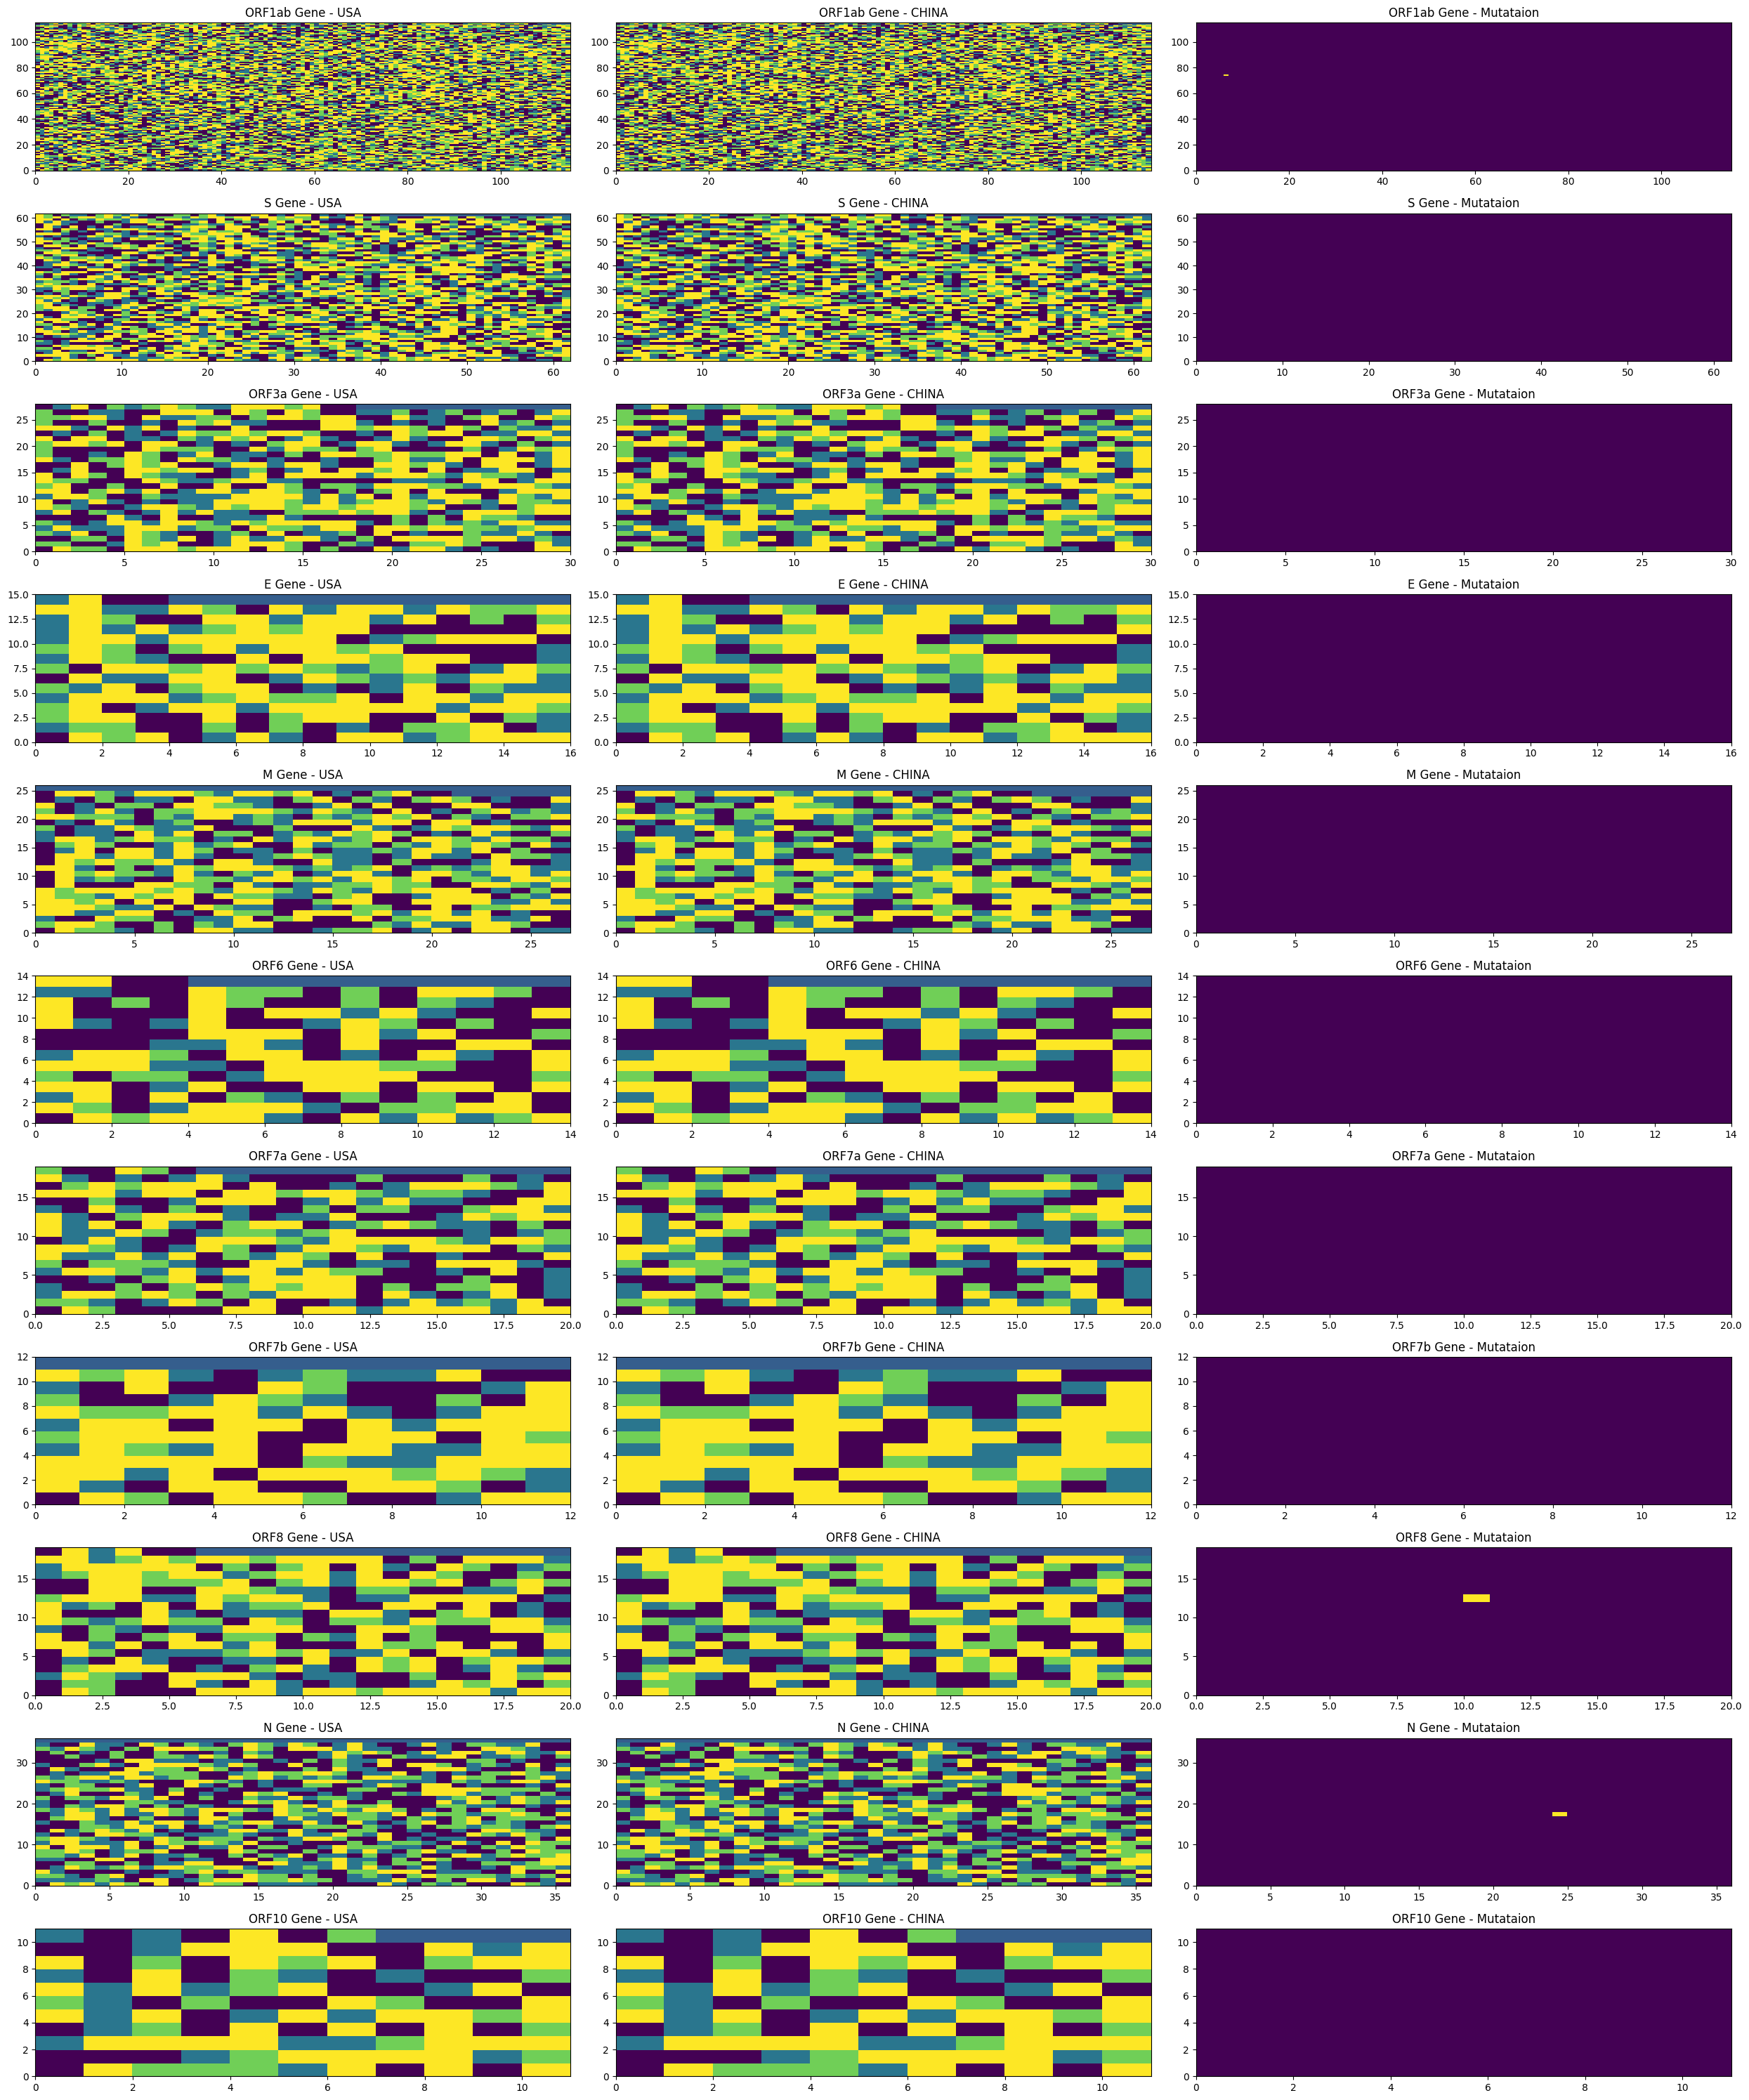

In [21]:
# Read the dna sequence file-1 previously downloaded from NCBI.
dict_seq_1 = read_dna_seq('/content/USA_Seq_2020_Jan.txt')
# Modify the sequence with dummy 'N' nucleotide.
dict_seq_1 = gene_mod(dict_seq_1)

# Read the dna sequence file-2 previously downloaded from NCBI.
dict_seq_2 = read_dna_seq('/content/China_Seq_2019_Dec.txt')
# Modify the sequence with dummy 'N' nucleotide.
dict_seq_2 = gene_mod(dict_seq_2)

# Create matplotlib subplots for each gene.
f,ax = plt.subplots(nrows=11,ncols=3,figsize=(25,30))
gene_name = list(numpy_image_dict.keys())
row = 0
col = 0
mut_dict={}
for i in gene_name:
    G = i[5:]
    # Loop thru each gene in the Cornona Virus nucleotide sequence.
    gene_us = dna(dict_seq_1['gene='+G][1])
    # Invoke the transcription method of the class dna
    gene_us.transcription()
    # Invoke the mothod that converts the gene sequence into a numpy array.
    numpfy_usa = gene_us.numpfy()
    # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
    numpfy_usa = numpfy_usa.reshape(numpy_image_dict['gene='+G][0])
    # sub-plot the numpy array with matplotlib pcolor method.
    ax[row][col].pcolor(numpfy_usa)
    ax[row][col].set_title(G+' Gene - USA')
    col+=1
    gene_china = dna(dict_seq_2['gene='+G][1])
    # Invoke the transcription method of the class dna
    gene_china.transcription()
    # Invoke the mothod that converts the gene sequence into a numpy array.
    numpfy_china = gene_china.numpfy()
    # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
    numpfy_china = numpfy_china.reshape(numpy_image_dict['gene='+G][0])
    # sub-plot the numpy array with matplotlib pcolor method.
    ax[row][col].pcolor(numpfy_china)
    ax[row][col].set_title(G+' Gene - CHINA')
    col+=1

    # To find the gene mutation subtract the numpy array from base sequence with the newer sequence. Here the
    # the Chinese sequence is the base sequence and the USA sequence is a newer sequence.
    mut = numpfy_china - numpfy_usa
    if mut.any():
        # Here we are looking for a non zero value in the mutated numpy array (result of the subtracting the 2 numpy arrays).
        # Presence of non-zero value means that there is difference between the 2 numpy arrays and the gene has
        # mutataions. If there are mutations in the gene create a python dictionary "mut_dict" with details as below.
        # {'<Gene_Name-1>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]], '<Gene_Name-2>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]]}
        mut_nec = np.nonzero(mut)
        x=mut_nec[0]
        y=mut_nec[1]
        l=0
        mut_dict[G]=[]
        for i in x:
            us_base = numpfy_usa[i][y[l]]
            ch_base = numpfy_china[i][y[l]]
            mut_base = mut[i][y[l]]
            info_list = [ch_base,us_base,mut_base,(i,y[l])]
            mut_dict[G].append(info_list)
            print("Mutated DNA Base {} in China and Base {} in USA at position {} For the Gene {}".format(ch_base,us_base,(i,y[l]),G))
            l+= 1
    # Giving a title to the matplotlib subplot
    ax[row][col].pcolor(mut)
    ax[row][col].set_title(G+' Gene - Mutataion')
    row+= 1
    col=0

f.tight_layout()
# Saving the matplotlib subplot as a jpg.
f.savefig('Sars_Cov-2_Gene_Mutation.jpg')

#Because both file is identical introducing multiple random mutations


In [59]:
#Read the two genome files
# Reference genome
ref_genome = read_dna_seq("/content/China_Seq_2019_Dec.txt")

# Sample genome
sample_genome = read_dna_seq("/content/USA_Seq_2020_Jan.txt")


# Extract the gene sequences

In [88]:
# Choose the gene to compare
gene_name = 'S'  # spike protein

# Reference sequence
ref_seq = ref_genome.get(gene_name, ref_genome.get(f'gene={gene_name}', [None, None]))[1]

# Sample sequence
sample_seq = sample_genome.get(gene_name, sample_genome.get(f'gene={gene_name}', [None, None]))[1]

# Clean sequences (remove newlines/spaces)
ref_seq = ref_seq.replace("\n", "").replace(" ", "").upper()
sample_seq = sample_seq.replace("\n", "").replace(" ", "").upper()

print("Reference length:", len(ref_seq))
print("Sample length:", len(sample_seq))


Reference length: 3822
Sample length: 3822


#Introduce mutations in the sample

In [89]:
import random

def introduce_mutations(seq, num_mutations=10):
    """Introduce random nucleotide mutations in a DNA sequence."""
    seq = list(seq)
    for _ in range(num_mutations):
        pos = random.randint(0, len(seq)-1)
        original_base = seq[pos]
        bases = ['A','T','G','C']
        bases.remove(original_base)  # avoid replacing with the same base
        seq[pos] = random.choice(bases)
        print(f"Mutation at position {pos}: {original_base} -> {seq[pos]}")
    return ''.join(seq)

# Introduce 10 random mutations in the sample
mutated_sample_seq = introduce_mutations(sample_seq, num_mutations=10)


Mutation at position 3432: T -> G
Mutation at position 1057: G -> C
Mutation at position 2339: A -> T
Mutation at position 2206: T -> C
Mutation at position 2464: T -> G
Mutation at position 3571: A -> G
Mutation at position 1131: A -> C
Mutation at position 333: T -> C
Mutation at position 1749: A -> C
Mutation at position 660: T -> G


# Use  mutation pipeline

In [90]:
def snp_detection(ref, sample):
    mutations = []
    for i, (r, s) in enumerate(zip(ref, sample)):
        if r != s:
            mutations.append((i, r, s))
    return mutations

snps = snp_detection(ref_seq, mutated_sample_seq)
print("Total SNPs detected:", len(snps))
print(snps)


Total SNPs detected: 10
[(333, 'T', 'C'), (660, 'T', 'G'), (1057, 'G', 'C'), (1131, 'A', 'C'), (1749, 'A', 'C'), (2206, 'T', 'C'), (2339, 'A', 'T'), (2464, 'T', 'G'), (3432, 'T', 'G'), (3571, 'A', 'G')]


# **Major mutation-checking technique**

In [91]:
#Check which genes are available
print("Reference genes:", ref_genome.keys())
print("Sample genes:", sample_genome.keys())


Reference genes: dict_keys(['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF10'])
Sample genes: dict_keys(['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF10'])


# TECHNIQUE 1: POSITION-WISE MUTATION DETECTION (SNPs)

In [94]:
def snp_detection(ref, sample):
    mutations = []
    for i, (r, s) in enumerate(zip(ref, sample)):
        if r != s:
            mutations.append((i, r, s))
    return mutations

snps = snp_detection(ref_seq, mutated_sample_seq)
print("Total SNPs detected:", len(snps))
print(snps)


Total SNPs detected: 10
[(333, 'T', 'C'), (660, 'T', 'G'), (1057, 'G', 'C'), (1131, 'A', 'C'), (1749, 'A', 'C'), (2206, 'T', 'C'), (2339, 'A', 'T'), (2464, 'T', 'G'), (3432, 'T', 'G'), (3571, 'A', 'G')]


# TECHNIQUE 2: INSERTION & DELETION DETECTION (INDEL)

In [98]:
def indel_positions(ref, sample):
    """
    Returns positions of insertions/deletions.
    - Deletion: base missing in sample compared to ref
    - Insertion: extra base in sample compared to ref
    """
    indels = []
    min_len = min(len(ref), len(sample))

    # check mismatches where one is missing (consider as indel)
    for i in range(min_len):
        if ref[i] != sample[i]:
            indels.append((i, ref[i], sample[i]))  # base change

    # check extra bases in sample
    if len(sample) > len(ref):
        for i in range(min_len, len(sample)):
            indels.append((i, '-', sample[i]))  # insertion
    # check missing bases in sample
    if len(ref) > len(sample):
        for i in range(min_len, len(ref)):
            indels.append((i, ref[i], '-'))  # deletion

    return indels

# Make a copy of the sample sequence
mutated_sample_seq = sample_seq

# Introduce a deletion at position 50
mutated_sample_seq = mutated_sample_seq[:50] + mutated_sample_seq[51:]

# Introduce an insertion at position 100
mutated_sample_seq = mutated_sample_seq[:100] + 'A' + mutated_sample_seq[100:]

# Now run INDEL detection
indels = indel_positions(ref_seq, mutated_sample_seq)
print("Total INDELs detected:", len(indels))
print("First 10 INDELs:", indels[:10])


Total INDELs detected: 37
First 10 INDELs: [(50, 'T', 'C'), (51, 'C', 'T'), (53, 'T', 'A'), (54, 'A', 'C'), (55, 'C', 'A'), (57, 'A', 'C'), (59, 'C', 'A'), (60, 'A', 'G'), (61, 'G', 'A'), (63, 'A', 'C')]


# TECHNIQUE 3: K-MER FREQUENCY COMPARISON

In [100]:
ref_k = kmer_freq(ref_seq)
sample_k = kmer_freq(mutated_sample_seq)

def kmer_distance(a, b):
    keys = set(a) | set(b)
    return sum(abs(a.get(k,0) - b.get(k,0)) for k in keys)

print("K-mer distance:", kmer_distance(ref_k, sample_k))


K-mer distance: 10


# TECHNIQUE 4: CODON-LEVEL MUTATION IMPACT

In [102]:
def codon_mutations(ref, sample):
    codon_changes = []
    for i in range(0, min(len(ref),len(sample))-2, 3):
        r = ref[i:i+3]
        s = sample[i:i+3]
        if r != s:
            codon_changes.append((i, r, s))
    return codon_changes

codons = codon_mutations(ref_seq, mutated_sample_seq)
print("Total codon mutations:", len(codons))
print("First 10 codon mutations:", codons[:10])



Total codon mutations: 17
First 10 codon mutations: [(48, 'AAT', 'AAC'), (51, 'CTT', 'TTA'), (54, 'ACA', 'CAA'), (57, 'ACC', 'CCA'), (60, 'AGA', 'GAA'), (63, 'ACT', 'CTC'), (66, 'CAA', 'AAT'), (69, 'TTA', 'TAC'), (75, 'CCT', 'CTG'), (78, 'GCA', 'CAT')]


# TECHNIQUE 5: SYNONYMOUS vs NON-SYNONYMOUS

In [104]:
def amino_acid(codon):
    return amacid_dict.get(codon.replace('T','U'), ('X',))[0]

def synonymous_analysis(ref, sample):
    syn, nonsyn = 0, 0
    for i in range(0, min(len(ref),len(sample))-2, 3):
        r, s = ref[i:i+3], sample[i:i+3]
        if r != s:
            if amino_acid(r) == amino_acid(s):
                syn += 1
            else:
                nonsyn += 1
    return syn, nonsyn

syn, nonsyn = synonymous_analysis(ref_seq, mutated_sample_seq)
print("Synonymous:", syn, "Non-synonymous:", nonsyn)



Synonymous: 2 Non-synonymous: 15


# TECHNIQUE 6: dN / dS RATIO (EVOLUTIONARY PRESSURE)


In [105]:
def dn_ds(ref, sample):
    syn, nonsyn = synonymous_analysis(ref, sample)
    return nonsyn / syn if syn != 0 else float('inf')

print("dN/dS ratio:", dn_ds(ref_seq, mutated_sample_seq))


dN/dS ratio: 7.5


# TECHNIQUE 7: NUMERIC DIFFERENCE (IMAGE-BASED)

In [106]:
from numpy.linalg import norm

ref_dna = dna(ref_seq)
sample_dna = dna(mutated_sample_seq)

ref_arr = ref_dna.numpfy()
sample_arr = sample_dna.numpfy()

distance = norm(ref_arr - sample_arr)
print("Numeric mutation distance:", distance)


Numeric mutation distance: 890.1645915222645


# TECHNIQUE 8: IMAGE DIFFERENCE (CNN-READY)

In [107]:
gene_name = 'gene=S'
shape = numpy_image_dict[gene_name][0]  # (rows, cols)
required_len = shape[0] * shape[1]

# pad sequences with N
ref_seq_pad = ref_seq + 'N' * (required_len - len(ref_seq))
sample_seq_pad = mutated_sample_seq + 'N' * (required_len - len(mutated_sample_seq))

# convert to dna object
ref_dna = dna(ref_seq_pad)
sample_dna = dna(sample_seq_pad)

# convert to numeric array
ref_arr = ref_dna.numpfy()
sample_arr = sample_dna.numpfy()

# reshape to 2D image
ref_img = ref_arr.reshape(shape)
sample_img = sample_arr.reshape(shape)

# compute difference
img_diff = np.mean(np.abs(ref_img - sample_img))
print("Image mutation score:", img_diff)


Image mutation score: 1.2650884495317378


# TECHNIQUE 9: AUTOENCODER-STYLE ANOMALY SCORE (SIMPLIFIED)

In [108]:
def anomaly_score(ref, sample):
    return np.mean(np.abs(ref - sample))

print("Anomaly score:", anomaly_score(ref_arr, sample_arr))


Anomaly score: 1.2650884495317378


# **OUTPUT COMPARISON TABLE**

In [109]:
results = {
    "SNP_count": len(snps),
    "INDEL_diff": indel_detection(ref_seq, sample_seq),
    "Kmer_distance": kmer_distance(ref_k, sample_k),
    "Codon_mutations": len(codons),
    "Synonymous": syn,
    "Non_synonymous": nonsyn,
    "dN_dS": dn_ds(ref_seq, sample_seq),
    "Numeric_distance": distance,
    "Image_score": img_diff
}

for k,v in results.items():
    print(f"{k}: {v}")


SNP_count: 10
INDEL_diff: 0
Kmer_distance: 10
Codon_mutations: 17
Synonymous: 2
Non_synonymous: 15
dN_dS: inf
Numeric_distance: 890.1645915222645
Image_score: 1.2650884495317378


#**Manually introduce mutations (small example)**

In [113]:
# original sequence (reference)
sample_seq = ref_seq  # copy

# introduce a mutation at position 100
pos = 100
original_base = sample_seq[pos]
# change to a different base
new_base = 'A' if original_base != 'A' else 'T'
sample_seq = sample_seq[:pos] + new_base + sample_seq[pos+10:]

print(f"Introduced mutation at position {pos}: {original_base} -> {new_base}")


Introduced mutation at position 100: G -> A


In [114]:
results = {
    "SNP_count": len(snps),
    "INDEL_diff": indel_detection(ref_seq, sample_seq),
    "Kmer_distance": kmer_distance(ref_k, sample_k),
    "Codon_mutations": len(codons),
    "Synonymous": syn,
    "Non_synonymous": nonsyn,
    "dN_dS": dn_ds(ref_seq, sample_seq),
    "Numeric_distance": distance,
    "Image_score": img_diff
}

for k,v in results.items():
    print(f"{k}: {v}")


SNP_count: 10
INDEL_diff: -9
Kmer_distance: 10
Codon_mutations: 17
Synonymous: 2
Non_synonymous: 15
dN_dS: 25.68888888888889
Numeric_distance: 890.1645915222645
Image_score: 1.2650884495317378
